In [13]:
###########################
# Siddhartha Dubey        #
# thesiddubey@gmail.com   #
# With help from Kaggle   #
###########################

In [14]:
import pandas as pd
import numpy as np
import sklearn as sci
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
input_path = "/Users/Siddhartha/Desktop/Project/Fraud.csv"

input = pd.read_csv(input_path)

In [16]:
input.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [17]:
input.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [18]:
input.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [19]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


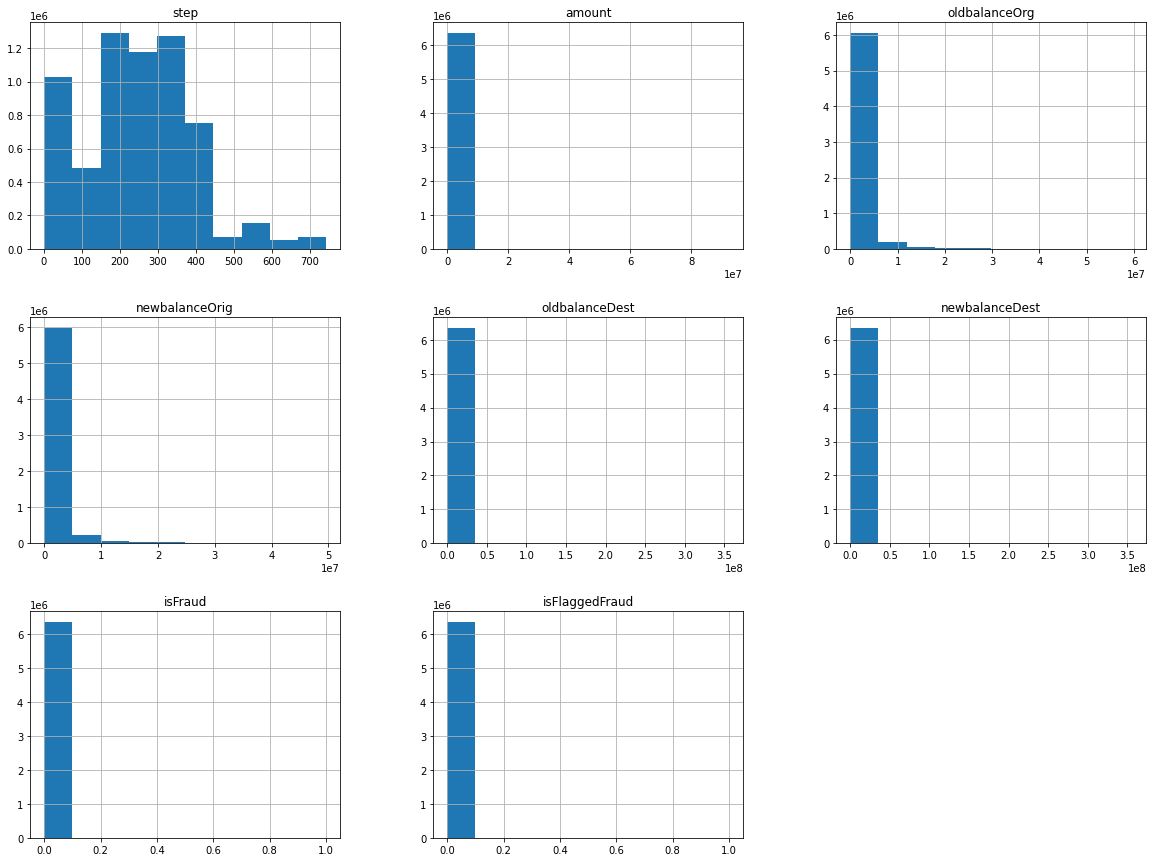

In [20]:
input.hist(bins=10,figsize=(20,15))
plt.show()

<AxesSubplot:>

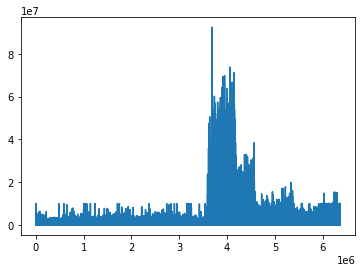

In [21]:
input['amount'].plot()

In [22]:
input.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [23]:
my_list = [0., 0.15, 0.30, 0.45, 0.60, 0.75, 0.9, 1.05, 1.25, np.inf]
bin = [1e6* i for i in my_list]
print(bin)
input["amount_cat"] = pd.cut(input["amount"],
 bins=bin,
 labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

print(input['amount'].max())
print(input['amount'].min())


[0.0, 150000.0, 300000.0, 450000.0, 600000.0, 750000.0, 900000.0, 1050000.0, 1250000.0, inf]
92445516.64
0.0


<AxesSubplot:>

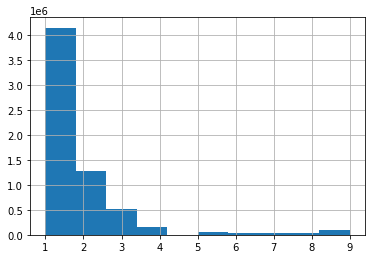

In [24]:
input['amount_cat'].hist()

In [25]:
from sklearn.preprocessing import OneHotEncoder

dummy = pd.get_dummies(input.type, prefix='Type')
#y = OneHotEncoder().fit_transform(train[['type']])
input.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_cat
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [26]:
# Reduce to target variable 'isFraud' and other parameters 
input = input.dropna()
X = input.drop(['isFraud','type','nameOrig','nameDest'], axis=1)
y = input['isFraud']

print(X.head())
print(y.head())
print(y[y==1].count())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud amount_cat  
0             0.0               0          1  
1             0.0               0          1  
2             0.0               0          1  
3             0.0               0          1  
4             0.0               0          1  
0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64
8197


In [27]:
X.isna().sum().sum()

0

In [28]:
# Using Synthetic Minority Oversampling Technique for balancing the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)
y_res = pd.DataFrame(y_res)


In [29]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)
#X_train.drop(['amount_cat'], axis=1)
#X_test.drop(['amount_cat'], axis=1)


In [30]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,amount_cat
1476726,141,1.081800e+03,0.000000e+00,0.0,0.000000,0.000000e+00,0,1
7675988,471,1.190065e+06,1.190065e+06,0.0,0.000000,0.000000e+00,0,8
12226925,684,6.445632e+06,6.445632e+06,0.0,16267.000248,6.461899e+06,0,9
10516150,519,7.176398e+04,7.176398e+04,0.0,0.000000,0.000000e+00,0,1
6705124,292,5.533159e+06,5.533159e+06,0.0,963816.230747,6.496976e+06,0,9


In [31]:
X_train.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,0.167910,0.084517,-0.025826,-0.012748,0.031198,0.035632
amount,0.167910,1.000000,0.645559,0.123135,0.015136,0.295565,0.055469
oldbalanceOrg,0.084517,0.645559,1.000000,0.824403,0.013525,0.134051,0.048303
newbalanceOrig,-0.025826,0.123135,0.824403,1.000000,0.050694,0.011537,0.070079
oldbalanceDest,-0.012748,0.015136,0.013525,0.050694,1.000000,0.908363,-0.006816
newbalanceDest,0.031198,0.295565,0.134051,0.011537,0.908363,1.000000,-0.009054
isFlaggedFraud,0.035632,0.055469,0.048303,0.070079,-0.006816,-0.009054,1.000000


In [32]:
X_train = X_train.drop(['amount_cat'], axis=1)
X_test = X_test.drop(['amount_cat'], axis=1)

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='amount'>

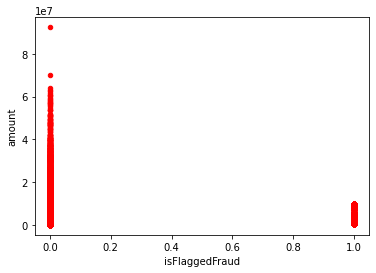

In [33]:
X_train.plot(kind='scatter',y='amount',x='isFlaggedFraud', c = 'r')

In [34]:
y_train['isFraud'].sum()/X_train['isFlaggedFraud'].sum()

778.9991243432574

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8896169 entries, 1476726 to 12490539
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 543.0 MB


In [36]:
# %% Function for plotting ROC_AUC curve
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [37]:

# Base score accuracy
#print("Base accuracy score we must beat is: ", 
#      df_non_fraud.fraud.count()/ np.add(df_non_fraud.fraud.count(),df_fraud.fraud.count()) * 100)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906323
           1       0.99      1.00      1.00   1906322

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

[[1896265   10058]
 [    498 1905824]]


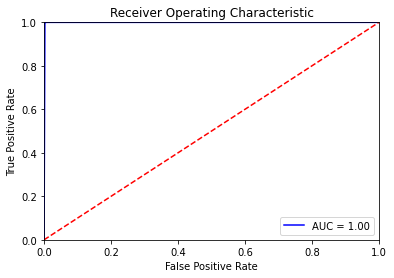

In [38]:
# K-neighbours & other models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(p=1)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, knn.predict_proba(X_test)[:,1])


/var/folders/5k/zq8s74qx1db5n_cjbwc53txc0000gn/T/ipykernel_71858/4049166186.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 54.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.6s finished


              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1906323
           1       0.98      0.99      0.98   1906322

    accuracy                           0.98   3812645
   macro avg       0.98      0.98      0.98   3812645
weighted avg       0.98      0.98      0.98   3812645

[[1864016   42307]
 [  28522 1877800]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.1s finished


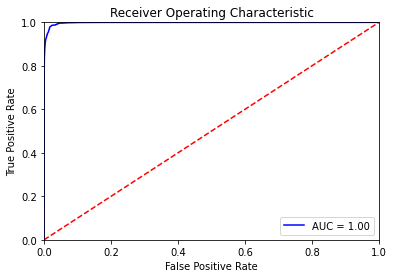

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


<class 'numpy.ndarray'>


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.0s finished


In [39]:
# Random Forest Classifier

rf = RandomForestClassifier(max_depth=8, random_state=42, verbose=1, class_weight='balanced')

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

plot_roc_auc(y_test, rf.predict_proba(X_test)[:,1])
print(type(rf.predict_proba(X_test)[:,1]))




[16:15:05] WARNING: /private/var/folders/5k/zq8s74qx1db5n_cjbwc53txc0000gn/T/pip-install-oqmr515b/xgboost_3bcbabaa812348c69b8a63f1ab1d556d/build/temp.macosx-10.9-x86_64-3.9/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906323
           1       1.00      1.00      1.00   1906322

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

[[1901093    5230]
 [   1867 1904455]]


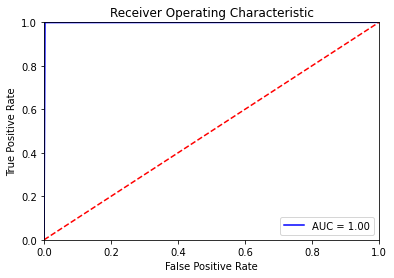

In [42]:
# XGBoost (Gradient Boost)
import xgboost as xgb

xboost = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, objective="binary:hinge", booster='gbtree',
    n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
    subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
    scale_pos_weight=1, base_score=0.5, random_state=42)

xboost.fit(X_train,y_train)

y_pred = xboost.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

plot_roc_auc(y_test, xboost.predict_proba(X_test)[:,1])